Nystrom
BFGS
SR1
Broyden
SVD
Linear Combination


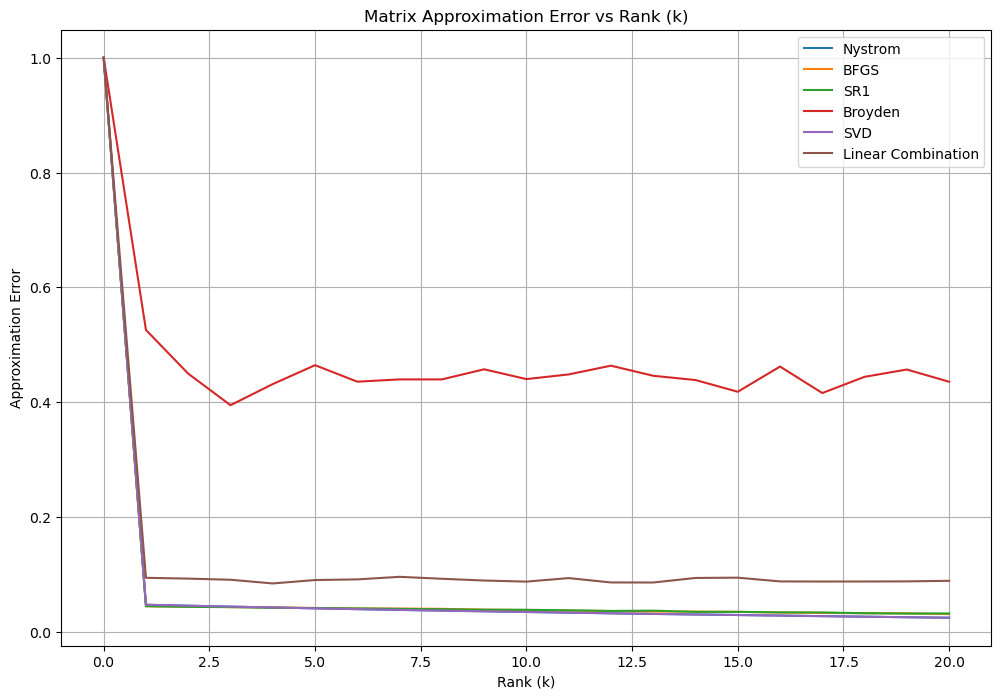

In [19]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Generate a random symmetric positive semi-definite matrix
np.random.seed(42)
n = 100  # Matrix size
A = np.random.rand(n, n)
A = np.dot(A, A.T)  # Ensures symmetry and positive semi-definiteness

# Define approximation methods
def nystrom_method(A, k):
    """Nystrom method approximation with rank-k."""
    U, S, Vt = np.linalg.svd(A)
    U_k, S_k = U[:, :k], np.diag(S[:k])
    return U_k @ S_k @ U_k.T

def bfgs_method(A, k):
    """BFGS approximation."""
    n = A.shape[0]
    H = np.eye(n)  # Initialize as identity matrix
    for _ in range(k):
        y = np.random.rand(n)
        s = A @ y
        diff = s - H @ y
        if np.dot(diff, y) != 0:  # Avoid division by zero
            H += np.outer(diff, diff) / np.dot(diff, y)
    return H

def sr1_method(A, k):
    """SR1 approximation."""
    n = A.shape[0]
    H = np.eye(n)  # Initialize as identity matrix
    for _ in range(k):
        y = np.random.rand(n)
        s = A @ y
        diff = s - H @ y
        if np.dot(diff, y) != 0:  # Avoid division by zero
            H += np.outer(diff, diff) / np.dot(diff, y)
    return H

def broyden_method(A, k):
    """Broyden approximation."""
    n = A.shape[0]
    H = np.eye(n)  # Initialize as identity matrix
    for _ in range(k):
        y = np.random.rand(n)
        s = A @ y
        H += np.outer(s - H @ y, y) / np.dot(y, y)
    return H

def svd_method(A, k):
    """Truncated SVD approximation with rank-k."""
    U, S, Vt = np.linalg.svd(A)
    U_k, S_k, V_k = U[:, :k], np.diag(S[:k]), Vt[:k, :]
    return U_k @ S_k @ V_k

# Linear combination method
def linear_combination_method(A, k):
    """Linear combination of yy^T, sy^T, ys^T, ss^T."""
    n = A.shape[0]
    yy, sy, ys, ss = [np.random.rand(n, n) for _ in range(4)]
    
    def loss_fn(coeffs):
        approx = coeffs[0] * (yy @ yy.T) + coeffs[1] * (sy @ sy.T) + \
                 coeffs[2] * (ys @ ys.T) + coeffs[3] * (ss @ ss.T)
        return np.linalg.norm(A - approx, ord='fro') / np.linalg.norm(A, ord='fro')
    
    coeffs = np.random.rand(4)
    result = minimize(loss_fn, coeffs, method="L-BFGS-B")
    coeffs_opt = result.x
    approx = coeffs_opt[0] * (yy @ yy.T) + coeffs_opt[1] * (sy @ sy.T) + \
             coeffs_opt[2] * (ys @ ys.T) + coeffs_opt[3] * (ss @ ss.T)
    return approx

# Error calculation
def calculate_error(A, approx):
    return np.linalg.norm(A - approx, ord='fro') / np.linalg.norm(A, ord='fro')

# Run approximations and calculate errors
errors = {"Nystrom": [1], "BFGS": [1], "SR1": [1], "Broyden": [1], "SVD": [1], "Linear Combination": [1]}
k_values = range(1, 21)

for k in k_values:
    nystrom = nystrom_method(A, k)
    bfgs = bfgs_method(A, k)
    sr1 = sr1_method(A, k)
    broyden = broyden_method(A, k)
    svd = svd_method(A, k)
    linear_comb = linear_combination_method(A, k)

    errors["Nystrom"].append(calculate_error(A, nystrom))
    errors["BFGS"].append(calculate_error(A, bfgs))
    errors["SR1"].append(calculate_error(A, sr1))
    errors["Broyden"].append(calculate_error(A, broyden))
    errors["SVD"].append(calculate_error(A, svd))
    errors["Linear Combination"].append(calculate_error(A, linear_comb))

# Plot results
plt.figure(figsize=(12, 8))
for method, err in errors.items():
    print(method)
    plt.plot([0]+list(k_values), err, label=method)
plt.xlabel("Rank (k)")
plt.ylabel("Approximation Error")
plt.title("Matrix Approximation Error vs Rank (k)")
plt.legend()
plt.grid()
plt.show()
